# MIE1628S 2025 A5: Assignment on Azure Cloud Platform - Part B

# Dataset: *National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset*

**Link:** https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

**Instance:** 6287

**feature:** 7


# Problem Statement：
Nowadays, the increasing rate of chronic diseases such as diabetes and cardiovascular disease (CVD) has posed a significant challenge to public health. Therefore, it is crucial to identify the risk of these diseases at an early stage to facilitate preventive interventions and enhance health outcomes. In the traditional medical domain, those health risk assessments rely on the judgment of experts and predefined medical guidelines. However, with the increase in population and the surge in demand for medical resources, data-driven approaches are emerging as an alternative for personalized health care and risk identification, enabled by the growing availability of large-scale, population-based health datasets.
The project would use a pre-selected subset of the dataset from the National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC). It collects extensive health and nutritional information from a diverse U.S. population, intending to assess the health and nutritional status of the United States’ population. From the statistics of the dataset, data analysis and machine learning techniques can be implemented to extract the underlying patterns and present a predictive insight into the classification of diabetes.


# Main Objective:
The primary goal of this project is to develop a machine learning model that can accurately predict the likelihood of diabetes based on physiological measurements, lifestyle choices, and biochemical markers from the subset of the NHANES 2013–2014 dataset. By data-driven analysis of the features like respondents’ age, BMI, or glucose levels, the project aims to identify the latent patterns and signal the potential risk of diabetes in order to support preventative care and risk management. Different predictive machine learning classification models would be deployed on Microsoft Notebook using Azure Machine Learning for comparison to the effectiveness of the results


# 0. Project Setup

In [ ]:
%pip install azure-ai-ml azure-identity pandas numpy matplotlib seaborn scikit-learn psycopg2-binary
%pip install pydash==5.1.0 --force-reinstall

  Using cached pydash-8.0.5-py3-none-any.whl.metadata (4.5 kB)
Using cached pydash-8.0.5-py3-none-any.whl (102 kB)
  Attempting uninstall: pydash
    Found existing installation: pydash 5.1.0
    Uninstalling pydash-5.1.0:
      Successfully uninstalled pydash-5.1.0
Note: you may need to restart the kernel to use updated packages.
  Using cached pydash-5.1.0-py3-none-any.whl.metadata (41 kB)
Using cached pydash-5.1.0-py3-none-any.whl (84 kB)
  Attempting uninstall: pydash
    Found existing installation: pydash 8.0.5
    Uninstalling pydash-8.0.5:
      Successfully uninstalled pydash-8.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
azure-ai-ml 1.28.1 requires pydash<9.0.0,>=6.0.0, but you have pydash 5.1.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (0.13.2)

Requirement already satisfied: numpy!=1.24.0,>=1.20 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from seaborn) (2.2.6)

Requirement already satisfied: pandas>=1.2 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from seaborn) (2.3.1)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from seaborn) (3.10.5)

Requirement already satisfied: contourpy>=1.0.1 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.3.2)

Requirement already satisfied: cycler>=0.10 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.59.0)

Requirement already satisfied: kiwisolver>=1.3.1 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.8)

Requirement already satisfied: packaging>=20.0 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (25.0)

Requirement already satisfied: pillow>=8 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (11.3.0)

Requirement already satisfied: pyparsing>=2.3.1 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.2.3)

Requirement already satisfied: python-dateutil>=2.7 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (2.9.0.post0)

Requirement already satisfied: pytz>=2020.1 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from pandas>=1.2->seaborn) (2025.2)

Requirement already satisfied: tzdata>=2022.7 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from pandas>=1.2->seaborn) (2025.2)

Requirement already satisfied: six>=1.5 in /anaconda/envs/jupyter_env/lib/python3.10/site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.4->seaborn) (1.17.0)

0

# 1. Dataset Analysis

In [ ]:
#import azure package
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

#import data analysis package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import ML package
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

## 1.1 Data Loading

In [ ]:
# authenticate and get a handle to the workspace
credential = DefaultAzureCredential()

ml_client = MLClient(
    credential=credential,
    subscription_id="3a12626e-8106-4618-afad-37f5fea28c81",
    resource_group_name="mie1628-project-rg",
    workspace_name="mie1628projectml",
)

No environment configuration found.

ManagedIdentityCredential will use Azure ML managed identity

In [ ]:
my_path = "https://mie1628project1068449261.blob.core.windows.net/azureml-blobstore-8256ee2b-5f40-4969-91a8-3a590269ef4e/UI/2025-08-01_004348_UTC/NHANES_age_prediction.csv"
# set the version number of the data asset
v2 = "1"

my_data = Data(
    name="NHANES_age_prediction",
    version=v2,
    description="NHANES age prediction",
    path=my_path,
    type=AssetTypes.URI_FILE,
)

try:
    data_asset = ml_client.data.get(name="NHANES_age_prediction", version=v2)
    print(
        f"Data asset already exists. Name: {my_data.name}, version: {my_data.version}"
    )
except:
    ml_client.data.create_or_update(my_data)
    print(f"Data asset created. Name: {my_data.name}, version: {my_data.version}")

DefaultAzureCredential acquired a token from ManagedIdentityCredential

Data asset already exists. Name: NHANES_age_prediction, version: 1


In [ ]:
data_asset = ml_client.data.get(name="NHANES_age_prediction", version=v2)
print(f"Data asset URI: {data_asset.path}")

# read into pandas
df = pd.read_csv(data_asset.path)
df.head()

Data asset URI: azureml://subscriptions/3a12626e-8106-4618-afad-37f5fea28c81/resourcegroups/mie1628-project-rg/workspaces/mie1628projectml/datastores/workspaceblobstore/paths/UI/2025-08-01_004348_UTC/NHANES_age_prediction.csv/


No environment configuration found.

ManagedIdentityCredential will use Azure ML managed identity

WARNING: Overriding of current TracerProvider is not allowed


WARNING: Overriding of current LoggerProvider is not allowed


WARNING: Overriding of current MeterProvider is not allowed


WARNING: Attempting to instrument while already instrumented


WARNING: Attempting to instrument while already instrumented


WARNING: Attempting to instrument while already instrumented


WARNING: Attempting to instrument while already instrumented


DefaultAzureCredential acquired a token from ManagedIdentityCredential

AzureMLCredential.get_token_info succeeded

ManagedIdentityCredential.get_token_info succeeded

DefaultAzureCredential acquired a token from ManagedIdentityCredential

No environment configuration found.

ManagedIdentityCredential will use Azure ML managed identity

WARNING: Overriding of current TracerProvider is not allowed


WARNING: Overriding of current LoggerProvider is not allowed


WARNING: Overriding of current MeterProvider is not allowed


WARNING: Attempting to instrument while already instrumented


WARNING: Attempting to instrument while already instrumented


WARNING: Attempting to instrument while already instrumented


WARNING: Attempting to instrument while already instrumented


DefaultAzureCredential acquired a token from ManagedIdentityCredential

AzureMLCredential.get_token_info succeeded

ManagedIdentityCredential.get_token_info succeeded

DefaultAzureCredential acquired a token from ManagedIdentityCredential

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


## 1.2 Data Cleaning

### Semantic Relabelling
To remove code-level ambiguity, the original survey variable names were renamed to meaningful labels. For example, RIDAGEYR to Age. This change helps make the data structure clearer for analysis and collaboration.

### Type Conversion
Continuous variables were converted to float64 or int64 types, while nominal variables, such as Gender, Diabetes_Status, and the newly added feature Age_Bin were recast as categorical features.

### Integrity and Duplication Assessment
Basic data checks using functions like info(), describe() confirmed that there were no missing values in any column. Uniqueness of Respondent_ID confirmed a one-to-one mapping between respondents and records, ensuring data consistency and enabling valid statistical inference.

### Construction of 20-Year Age Bins
A new variable was created by dividing the continuous Age variable into five age groups: 0–19, 20–39, 40–59, 60–79, and 80 years or older. This grouped version of age allows for easier comparison between age ranges, while the original age variable was kept for modeling.

### Outlier Evaluation and Retention
Boxplots and Z-score histograms were used to check for unusual values in BMI, Glucose, and Insulin. Although some high values were found, they were within reasonable biological limits. Since the project focuses on identifying high-risk metabolic conditions, these values were kept to preserve the real-world variation in the data.


In [ ]:
# Apply renaming
rename_map = {
    'age_group': 'Age_Group',
    'RIDAGEYR': 'Age',
    'RIAGENDR': 'Gender',
    'PAQ605': 'Physical_Activity',
    'BMXBMI': 'BMI',
    'LBXGLU': 'Glucose',
    'DIQ010': 'Diabetes_Status',
    'LBXGLT': 'Glucose_Tolerance',
    'LBXIN': 'Insulin'
}

df.rename(columns=rename_map, inplace=True)

# Drop Respondent ID
df = df.drop(columns=['SEQN'])

# Create 20-year bins as strings
df['Age_Bin'] = pd.cut(
    df['Age'],
    bins=list(range(0, 121, 20)),
    right=False,
    labels=[f'{i}-{i+19}' for i in range(0, 120, 20)]
).astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age_Group          2278 non-null   object 
 1   Age                2278 non-null   float64
 2   Gender             2278 non-null   float64
 3   Physical_Activity  2278 non-null   float64
 4   BMI                2278 non-null   float64
 5   Glucose            2278 non-null   float64
 6   Diabetes_Status    2278 non-null   float64
 7   Glucose_Tolerance  2278 non-null   float64
 8   Insulin            2278 non-null   float64
 9   Age_Bin            2278 non-null   object 
dtypes: float64(8), object(2)
memory usage: 178.1+ KB


## 1.3 Data Visualization
5 graphs and charts are selected and explained in the report

**Age Distribution Chart**

Transmission succeeded: Item received: 8. Items accepted: 8

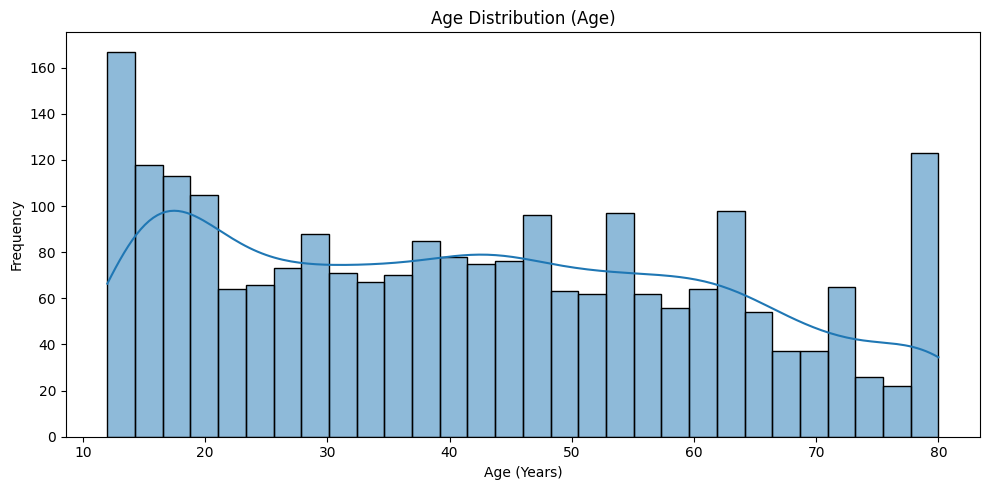

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution (Age)')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("age_distribution.jpg")


**Heatmap visualized correlation between the numberic features**



Transmission succeeded: Item received: 26. Items accepted: 26

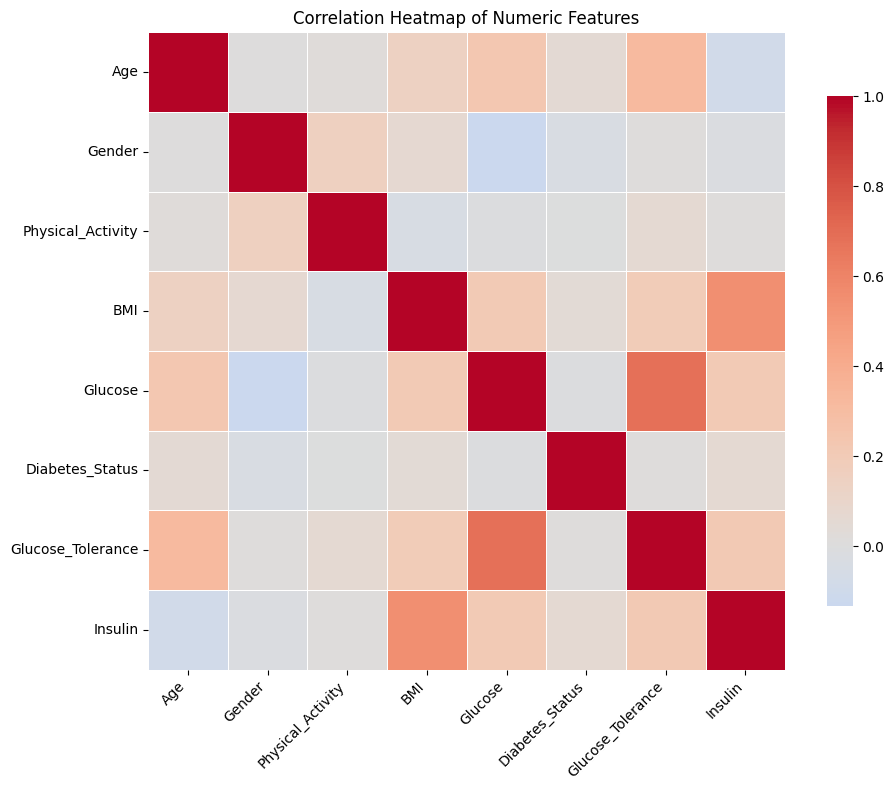

In [ ]:
# Plot heatmap
numeric_features = df.select_dtypes(include='number')
corr_matrix = numeric_features.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap of Numeric Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

**Distribution of features related to age group of every 20 years**

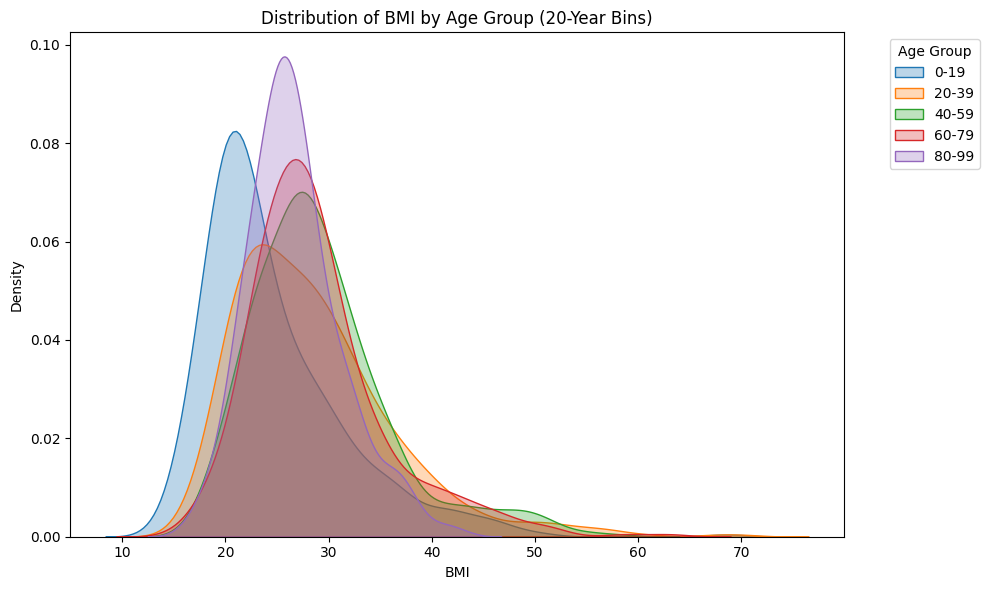

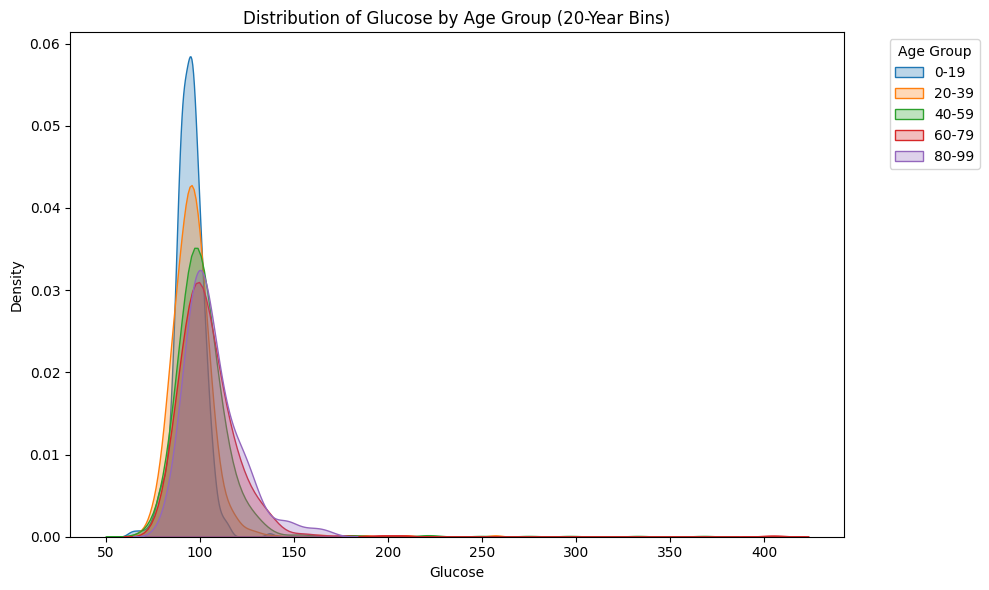

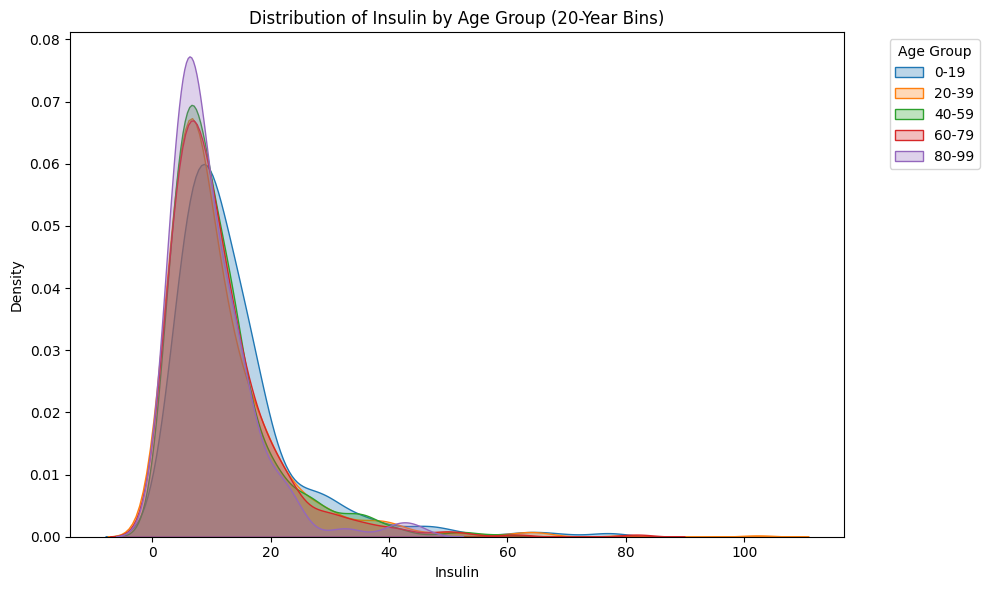

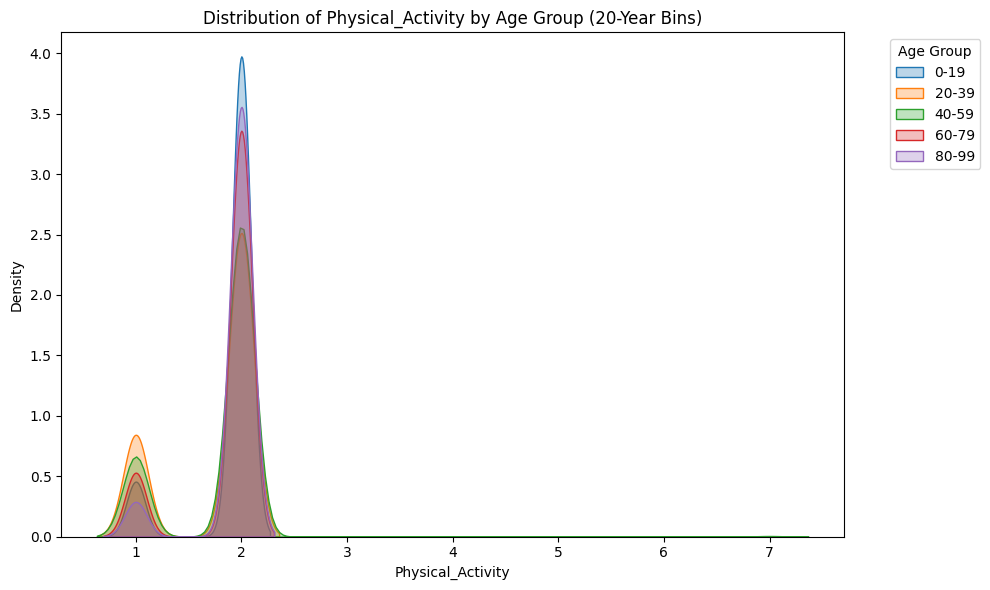

In [ ]:
# Drop rows with missing bin
df_plot = df.dropna(subset=['Age_Bin'])

# Features list
features = ['BMI', 'Glucose', 'Insulin', 'Physical_Activity']

# Loop through each feature
for feature in features:
    plt.figure(figsize=(10, 6))

    # Plot each age group manually
    for group in sorted(df_plot['Age_Bin'].unique()):
        sns.kdeplot(
            data=df_plot[df_plot['Age_Bin'] == group],
            x=feature,
            fill=True,
            alpha=0.3,
            label=group
        )

    plt.title(f'Distribution of {feature} by Age Group (20-Year Bins)')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

**BMI vs Insulin with Glucose Level Coloring**

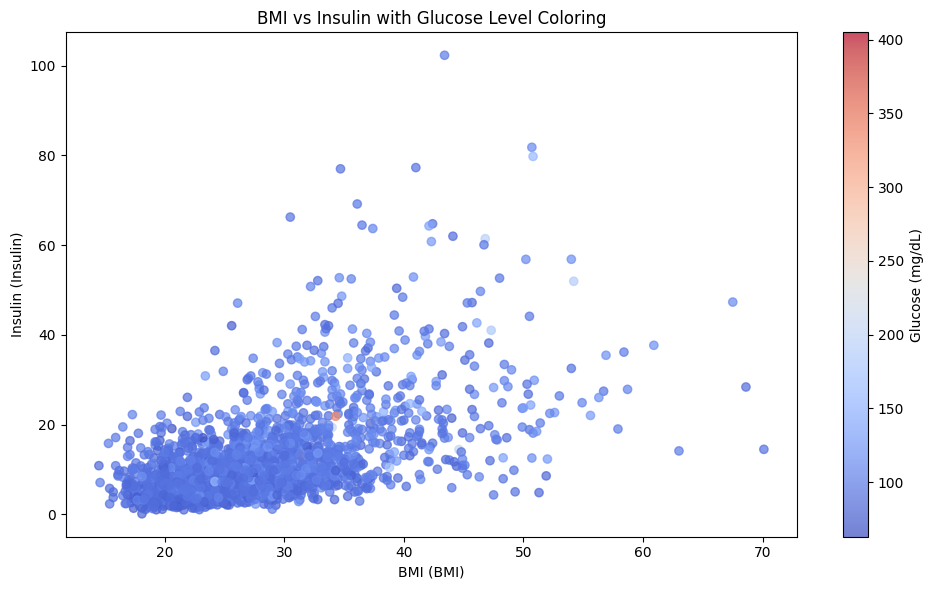

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['BMI'],
    df['Insulin'],
    c=df['Glucose'],
    cmap='coolwarm',
    alpha=0.7
)

plt.colorbar(scatter, label='Glucose (mg/dL)')
plt.title('BMI vs Insulin with Glucose Level Coloring')
plt.xlabel('BMI (BMI)')
plt.ylabel('Insulin (Insulin)')
plt.tight_layout()
plt.show()

**box plot of BMI by gender**

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

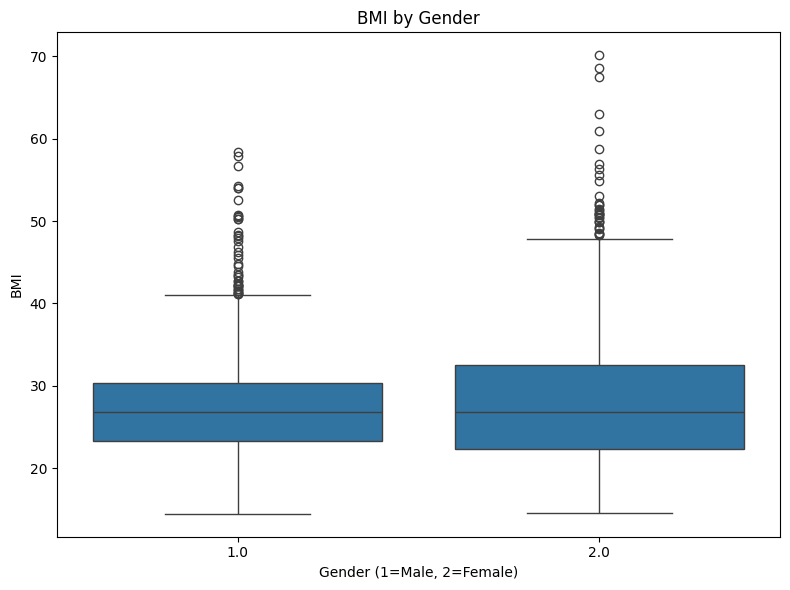

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='BMI', data=df)
plt.title('BMI by Gender')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('BMI')
plt.tight_layout()
plt.savefig('bmi_by_gender.png')

**Glucose Level by Diabetes Status**

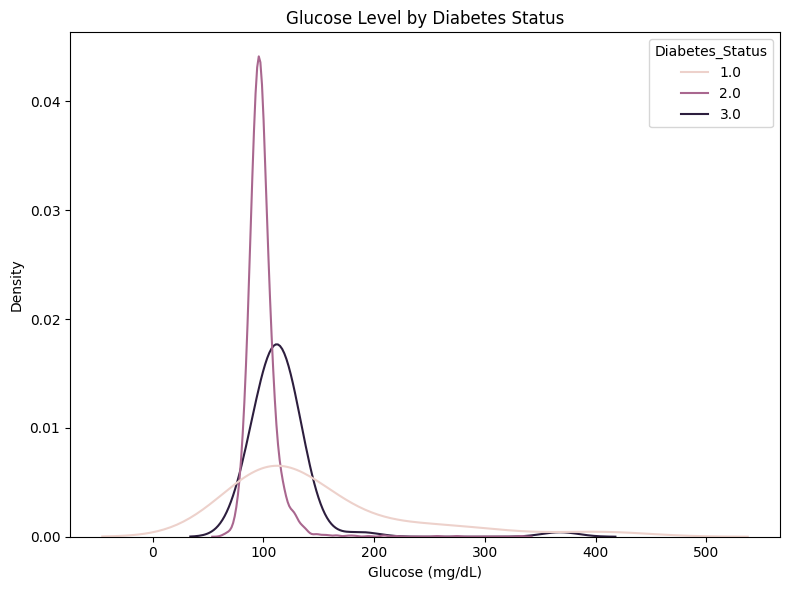

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Glucose', hue='Diabetes_Status', common_norm=False)
plt.title('Glucose Level by Diabetes Status')
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('glucose_by_diabetes_status.png')

**'Distribution of Oral Glucose Tolerance (LBXGLT) by Diabetes Status**

/tmp/ipykernel_3450/16374161.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='DIQ010 (Diabetes Status)')


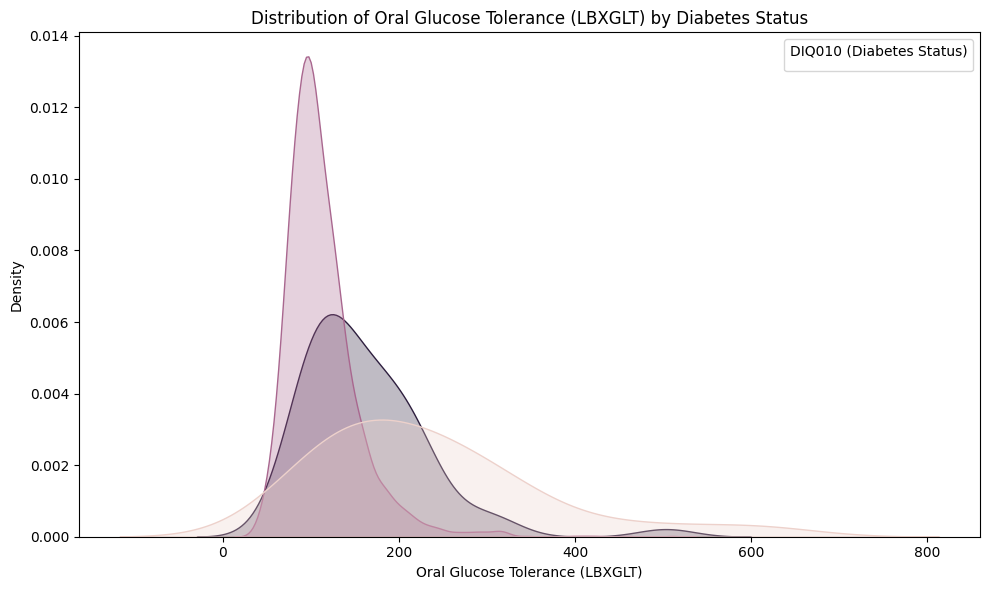

In [ ]:
plt.figure(figsize=(10, 6))
# If columns were renamed
sns.kdeplot(data=df, x='Glucose_Tolerance', hue='Diabetes_Status', common_norm=False, fill=True, alpha=0.3)

plt.title('Distribution of Oral Glucose Tolerance (LBXGLT) by Diabetes Status')
plt.xlabel('Oral Glucose Tolerance (LBXGLT)')
plt.ylabel('Density')
plt.legend(title='DIQ010 (Diabetes Status)')
plt.tight_layout()
plt.show()

**Glucose vs Age by Diabetes Status**

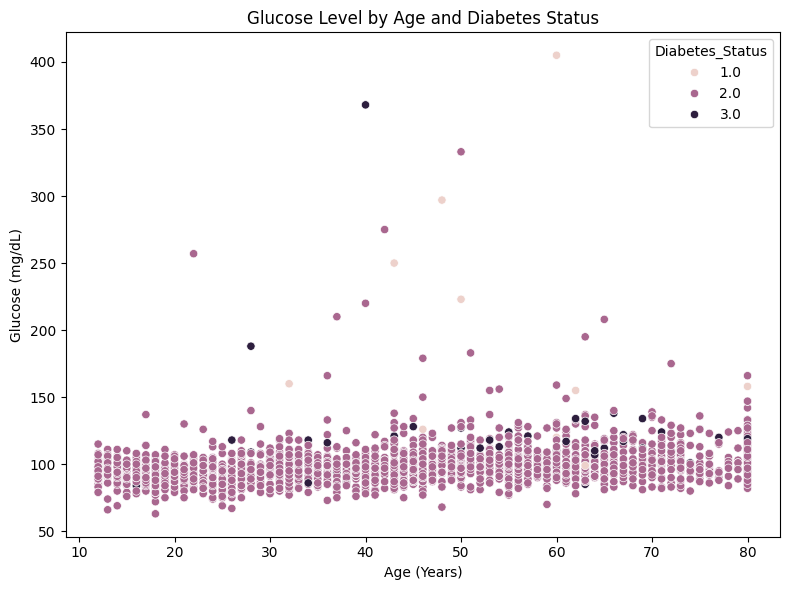

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Glucose', hue='Diabetes_Status', data=df)
plt.title('Glucose Level by Age and Diabetes Status')
plt.xlabel('Age (Years)')
plt.ylabel('Glucose (mg/dL)')
plt.tight_layout()

**Oral Glucose Tolerance vs Age by Diabetes Status**

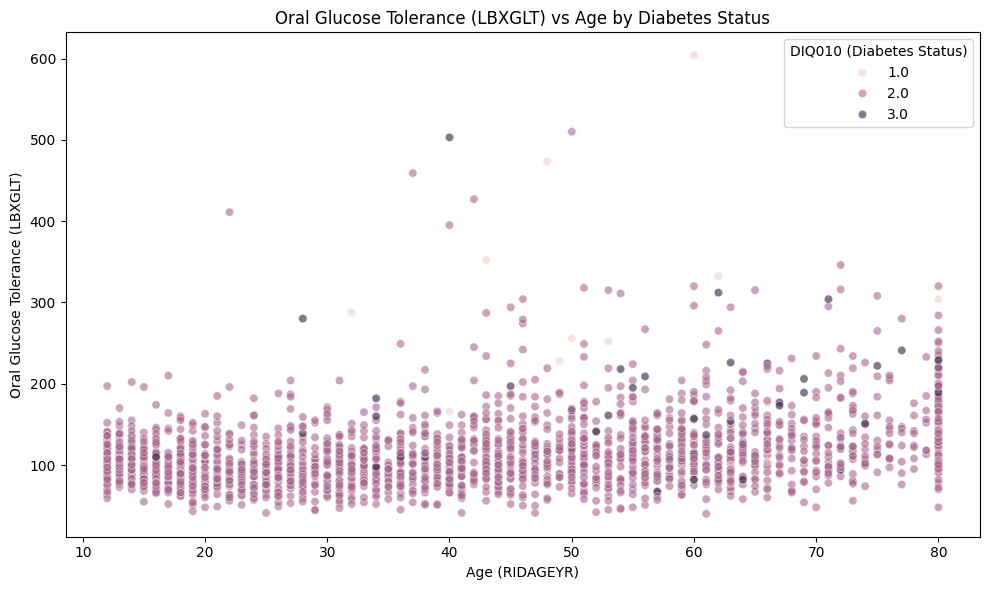

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Glucose_Tolerance', hue='Diabetes_Status', alpha=0.6)

plt.title('Oral Glucose Tolerance (LBXGLT) vs Age by Diabetes Status')
plt.xlabel('Age (RIDAGEYR)')
plt.ylabel('Oral Glucose Tolerance (LBXGLT)')
plt.legend(title='DIQ010 (Diabetes Status)')
plt.tight_layout()
plt.show()

# 2. Machine Learning Model

## 2.1. Data Preprocessing

### Feature Engineering
Two new features were constructed to enhance the representational capacity of the dataset.

- A glucose-to-insulin ratio was derived to capture potential nonlinear interactions between blood glucose and insulin levels, while preventing division by zero through a small constant adjustment.
- Body Mass Index (BMI) was grouped into four categories: Underweight, Normal, Overweight, and Obese. These groups were based on commonly used medical standards and make it easier to study patterns across weight categories.

### Handle Missing Values
Missing values were addressed in a two-step process to make sure the dataset was complete.

- For numerical columns, missing values were filled in using the average (mean) of each column.
- For non-numeric columns, any remaining missing values were replaced using the most common value (mode) in that column.
- After this process, there were no missing values in the dataset, making it ready for further analysis and encoding.

### Categorical Variable Encoding
To facilitate compatibility with machine learning models, categorical variables were transformed using one-hot encoding.

- This encoding was applied to selected features, including gender, BMI category, and predefined age groupings.
- To reduce redundancy, the first category of each encoded variable was excluded from the final feature set.

### Feature Selection
The target variable identified for prediction was the individual’s diabetes status.

- All remaining variables, excluding the target, were considered as potential features or predictors.
- The final feature matrix was defined by excluding the target from the set of all available variables.

### Feature Scaling
All numerical features in the input matrix were standardized using StandardScaler.

- This process adjusted each numeric column to have a mean of zero and a standard deviation of one.
- This ensures that all numeric variables are on the same scale before training a model.

### Train-Test Split
The dataset was divided into training and testing sets using an 80/20 split.

- The target variable was separated from the input features.
- The split was performed with a fixed random seed to ensure reproducibility.
- Stratified sampling was applied based on the target variable, so that class proportions in the training and testing sets are consistent with the original distribution.
- This approach helps maintain class balance and supports reliable model evaluation on unseen data.


In [ ]:
# Feature engineering
df['Glu_Insulin_Ratio'] = df['Glucose'] / (df['Insulin'] + 1e-5)
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Fill missing values if any
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

# One-hot encode
df_encoded = pd.get_dummies(df, columns=['Gender', 'BMI_Category', 'Age_Group', 'Age_Bin'], drop_first=True)

# Targets to predict
target = 'Diabetes_Status'

feature_cols = df_encoded.columns.difference([target])
X = df_encoded[feature_cols]

# Scale numeric features
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include='number').columns
X.loc[:,numeric_cols] = scaler.fit_transform(X[numeric_cols])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age_Group          2278 non-null   object  
 1   Age                2278 non-null   float64 
 2   Gender             2278 non-null   float64 
 3   Physical_Activity  2278 non-null   float64 
 4   BMI                2278 non-null   float64 
 5   Glucose            2278 non-null   float64 
 6   Diabetes_Status    2278 non-null   float64 
 7   Glucose_Tolerance  2278 non-null   float64 
 8   Insulin            2278 non-null   float64 
 9   Age_Bin            2278 non-null   object  
 10  Glu_Insulin_Ratio  2278 non-null   float64 
 11  BMI_Category       2278 non-null   category
dtypes: category(1), float64(9), object(2)
memory usage: 198.3+ KB


### Train-Test Split
The dataset was divided into training and testing sets using an 80/20 split.

- The target variable was separated from the feature matrix.
- The split was performed with a fixed random seed to ensure reproducibility.
- Stratified sampling was not applied, so class proportions in the target variable may differ slightly between the two sets.

This split supports unbiased model evaluation on unseen data.


In [ ]:
y = df_encoded[target]
# test-train 20/80 Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 2.2. ML model implementation

### 2.2.1. SVM(support vector machine) Implementation

- Effective in  high-dimensional spaces with small to medium size datasets, as the dataset has a size ~6000 instances for the usage
- It is good for handling the imbalance and overlapping classes as the ratio of non-diabetic and diabetic is imbalanced.
-  Captures non-linear patterns in different features and effective with high-dimensional medical data, especially after feature engineering and normalization  


In [ ]:
# Model SVM
name = 'SVM'
model = SVC(class_weight='balanced')

Accuracy: 0.8180
RMSE: 0.4564


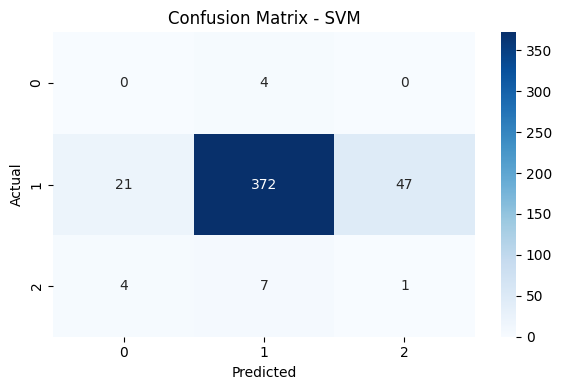

In [ ]:
# Train & evaluate each model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)

# RMSE (only meaningful if target is numeric or ordinal)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Output
print(f"Accuracy: {acc:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

From the result of the SVM model , we could see that the SVM classifier performs well on the dominant class (1: Diabetic) due to more training examples. However, it performs poorly on underrepresented classes (0 and 2), possibly due to class imbalance. From the confusion matrix, 441 samples were correctly classified as class 2 (the dominant class). 3 samples from class 1 and 11 from class 3 all predicted as class 2.The SVM achieves good overall accuracy of 0.83 and lowest RMSE, but it overfits to the majority class, failing to detect minority diabetes statuses.

### 2.2.2. Decision Tree Implementation

- It is highly interpretable and intuitive,  as it allows users to trace back decisions to specific thresholds
- Captures non-linear dependencies between multiple continuous features like age, BMI, and insulin level
- Robust to missing or noisy data


In [ ]:
# Model decison tree
name = 'Decision Tree'
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')

Accuracy: 0.9189
RMSE: 0.2962


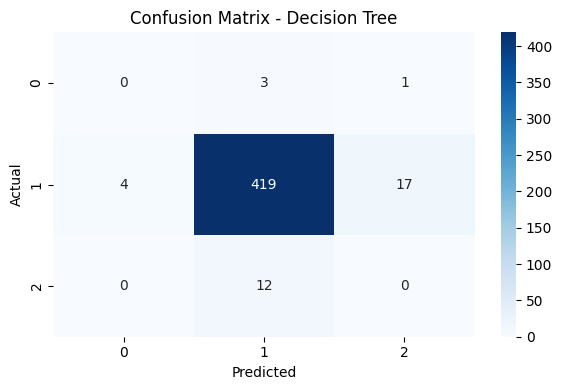

In [ ]:
# Train & evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)

# RMSE (only meaningful if target is numeric or ordinal)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Output
print(f"Accuracy: {acc:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

The Decision Tree performs well on the dominant class but fails on minority classes with accuracy of 0.9189. RMSE is 0.2962 which is a relatively low prediction error on average as it can predict good results on average. For the confusion matrix, we can see that the majority of predictions (419 out of 456) are correct yet most errors happen in the minority class(1 and 3 misclassified as class 2) and they are possibly resulted from the imbalance in the dataset.


## 2.3. Hyperparameter Tuning
Use Grid Search for hyper-parameter tuning

### 2.3.1. SVM Tuning

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Accuracy: 0.9649
RMSE: 0.1873


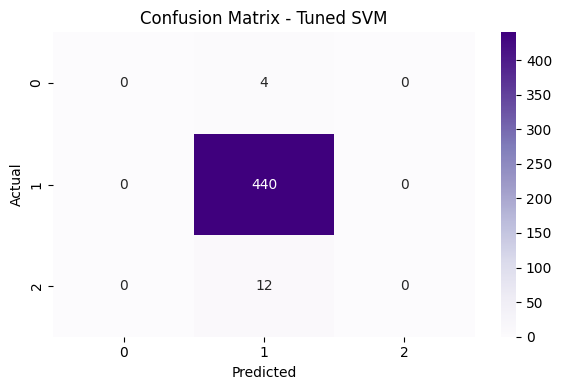

In [ ]:
# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)

# Train
grid_search.fit(X_train, y_train)

# Best model
best_svm = grid_search.best_estimator_
print("\nBest SVM Parameters:", grid_search.best_params_)

# Predict
y_pred = best_svm.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"RMSE: {rmse:.4f}")

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Tuned SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


The tuned SVM model  has a high accuracy of 0.9649 and low RMSE of 0.187 which is a good result for prediction。 However, from the confusion matrix, we can see that all predictions go to class 1 and all other classes are misclassified which is resulted from the class imbalance. The model could detect the majority class(Class 2) correctly yet it could not detect the minority class(Class 0 and 1).

### 2.3.2. Decision Tree Tuning

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

Accuracy: 0.9539
RMSE: 0.2146


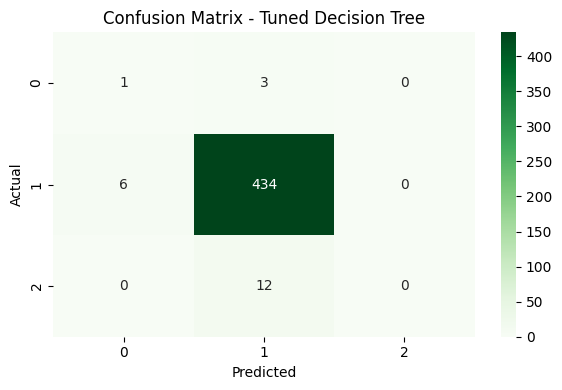

Transmission succeeded: Item received: 3. Items accepted: 3

In [ ]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Train
grid_search.fit(X_train, y_train)

# Best model
best_tree = grid_search.best_estimator_
print("\nBest Decision Tree Parameters:", grid_search.best_params_)

# Predict
y_pred = best_tree.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"RMSE: {rmse:.4f}")

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

The tuned Decision Tree model achieved a high accuracy of 0.954 and a low RMSE of 0.2146, indicating strong overall predictive performance. The confusion matrix reveals that the model correctly classified 434 out of 442 samples in the majority class (Class 1), and managed to identify 1 out of 4 early-stage diabetes cases (Class 0), while still failing to detect advanced cases (Class 2) We could see that the dataset is an unbalanced dataset in the class of diabetes and resulted in the overall overfitting for majority class(Class 1)